In [63]:
!pip install numpy pandas matplotlib
!pip install seaborn

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
training_set = tf.keras.utils.image_dataset_from_directory(
   
    r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\sugarcanedata\train",

    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
 # 'C:/Users/abc/Desktop/Final Project/RiceLeafsDisease/train',

Found 2719 files belonging to 6 classes.


In [66]:
print(training_set.class_names)


['Healthy', 'Leaf Scald', 'Mosaic', 'Red Rot', 'Rust', 'Yellow Disease']


In [67]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\sugarcanedata\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2719 files belonging to 6 classes.


In [68]:
print(validation_set.class_names)


['Healthy', 'Leaf Scald', 'Mosaic', 'Red Rot', 'Rust', 'Yellow Disease']


In [69]:
cnn = tf.keras.models.Sequential()

In [70]:
# import tensorflow as tf

# cnn = tf.keras.models.Sequential([
    
#     # 🔹 Convolutional Layer 1
#     tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

#     # 🔹 Convolutional Layer 2
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

#     # 🔹 Convolutional Layer 3
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

#     # 🔹 Flattening Layer
#     tf.keras.layers.Flatten(),

#     # 🔹 Fully Connected Dense Layer
#     tf.keras.layers.Dense(units=128, activation='relu'),

#     # 🔹 Output Layer (10 Classes)
#     tf.keras.layers.Dense(units=10, activation='softmax') 
# ])

# # ✅ Compile Model
# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 📌 Model Summary
# cnn.summary()


import tensorflow as tf

cnn = tf.keras.models.Sequential([

    # 🔹 Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 🔹 Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 🔹 Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 🔹 Flatten
    tf.keras.layers.Flatten(),

    # 🔹 Dense Layer
    tf.keras.layers.Dense(128, activation='relu'),

    # 🔹 Output Layer for 6 Classes
    tf.keras.layers.Dense(6, activation='softmax')
])

# ✅ Compile
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
cnn.summary()



C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,454 (16.36 MB)

 Trainable params: 4,288,454 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
!pip install keras==2.14 tensorflow==2.14



  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)


ERROR: Could not find a version that satisfies the requirement tensorflow==2.14 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.14


In [72]:
# training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)
cnn = tf.keras.models.Sequential([
    # CNN layers
    tf.keras.layers.Dense(7, activation='softmax')  # Change 38 → 10
])

# cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))


In [83]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)



In [84]:
print(f"Training set samples: {len(training_set)}")
print(f"Validation set samples: {len(validation_set)}")


Training set samples: 85
Validation set samples: 85


In [90]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define the CNN Model
# cnn = keras.Sequential([
#     layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
#     layers.MaxPooling2D(pool_size=2),
#     layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
#     layers.MaxPooling2D(pool_size=2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(6, activation='softmax')  # 10 classes (change if needed)
# ])

# # Compile the Model
# cnn.compile(optimizer='adam',
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])

# # Train the Model
# training_history = cnn.fit(training_set, validation_data=validation_set, epochs=7)



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN Model
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # ✅ 6 classes
])

# Compile the Model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the Model
training_history = cnn.fit(training_set, validation_data=validation_set, epochs=6)



Epoch 1/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.3783 - loss: 217.3465 - val_accuracy: 0.6638 - val_loss: 1.1049
Epoch 2/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 28s 331ms/step - accuracy: 0.6706 - loss: 0.8994 - val_accuracy: 0.9014 - val_loss: 0.3976
Epoch 3/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.8464 - loss: 0.4509 - val_accuracy: 0.9301 - val_loss: 0.2323
Epoch 4/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - accuracy: 0.9235 - loss: 0.2640 - val_accuracy: 0.9603 - val_loss: 0.1318
Epoch 5/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 296ms/step - accuracy: 0.8383 - loss: 0.5099 - val_accuracy: 0.9489 - val_loss: 0.2515
Epoch 6/6
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.9409 - loss: 0.2199 - val_accuracy: 0.9853 - val_loss: 0.0580


In [91]:
#Training set Accuracy

train_loss, train_acc = cnn.evaluate(training_set, verbose=1)
print('Training Accuracy:', train_acc)


# train_loss, train_acc = cnn.evaluate(training_set)
# print('Training accuracy:', train_acc)

85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.9852 - loss: 0.0600
Training Accuracy: 0.985288679599762


In [92]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9843 - loss: 0.0606
Validation accuracy: 0.985288679599762


In [93]:
cnn.save('trained_plant_disease_model.keras')

In [94]:
training_history.history #Return Dictionary of history

{'accuracy': [0.44538432359695435,
  0.710187554359436,
  0.8672305941581726,
  0.9326958656311035,
  0.8098565936088562,
  0.9444648623466492],
 'loss': [63.76340103149414,
  0.8071503639221191,
  0.3928923010826111,
  0.2408071756362915,
  0.5750822424888611,
  0.18858236074447632],
 'val_accuracy': [0.663847029209137,
  0.9014343619346619,
  0.9301213622093201,
  0.9602795243263245,
  0.948878288269043,
  0.985288679599762],
 'val_loss': [1.1049046516418457,
  0.39764735102653503,
  0.23225374519824982,
  0.13180062174797058,
  0.2514888346195221,
  0.05804450809955597]}

In [95]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [96]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


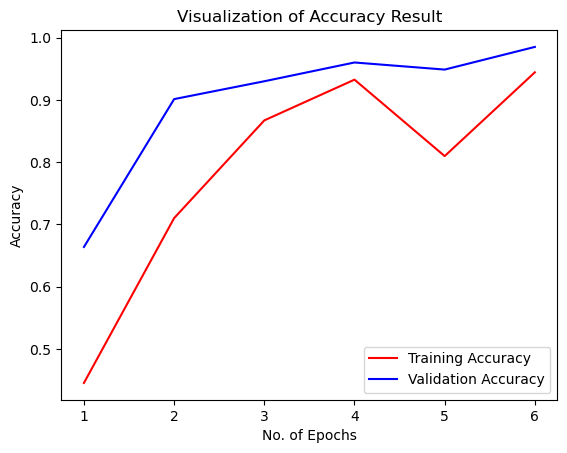

In [97]:
# epochs = [i for i in range(1,6)]
# plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
# plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
# plt.xlabel('No. of Epochs')
# plt.title('Visualization of Accuracy Result')
# plt.legend()
# plt.show()
# Number of epochs should be equal to the number of epochs used during training
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]

# Plot Training and Validation Accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [98]:
# class_name = validation_set.class_names
class_names = validation_set.class_names
print(class_names)


['Healthy', 'Leaf Scald', 'Mosaic', 'Red Rot', 'Rust', 'Yellow Disease']


In [99]:
test_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\sugarcanedata\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2719 files belonging to 6 classes.


In [100]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2719/2719 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step


In [101]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [102]:
Y_true

<tf.Tensor: shape=(2719,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [103]:
predicted_categories

<tf.Tensor: shape=(2719,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [105]:
# Precision Recall Fscore
# Define class names (adjust these based on your actual classes)
class_name = ['Healthy', 'Leaf Scald', 'Mosaic', 'Red Rot', 'Rust', 'Yellow Disease']

# Precision, Recall, F-Score
from sklearn.metrics import classification_report

# Assuming Y_true and predicted_categories are defined
print(classification_report(Y_true, predicted_categories, target_names=class_name))

# print(classification_report(Y_true,predicted_categories,target_names=class_name))

                precision    recall  f1-score   support

       Healthy       0.97      0.99      0.98       768
    Leaf Scald       0.99      0.98      0.99       350
        Mosaic       0.98      0.96      0.97       370
       Red Rot       1.00      1.00      1.00       415
          Rust       1.00      0.99      0.99       412
Yellow Disease       0.99      0.99      0.99       404

      accuracy                           0.99      2719
     macro avg       0.99      0.98      0.99      2719
  weighted avg       0.99      0.99      0.99      2719



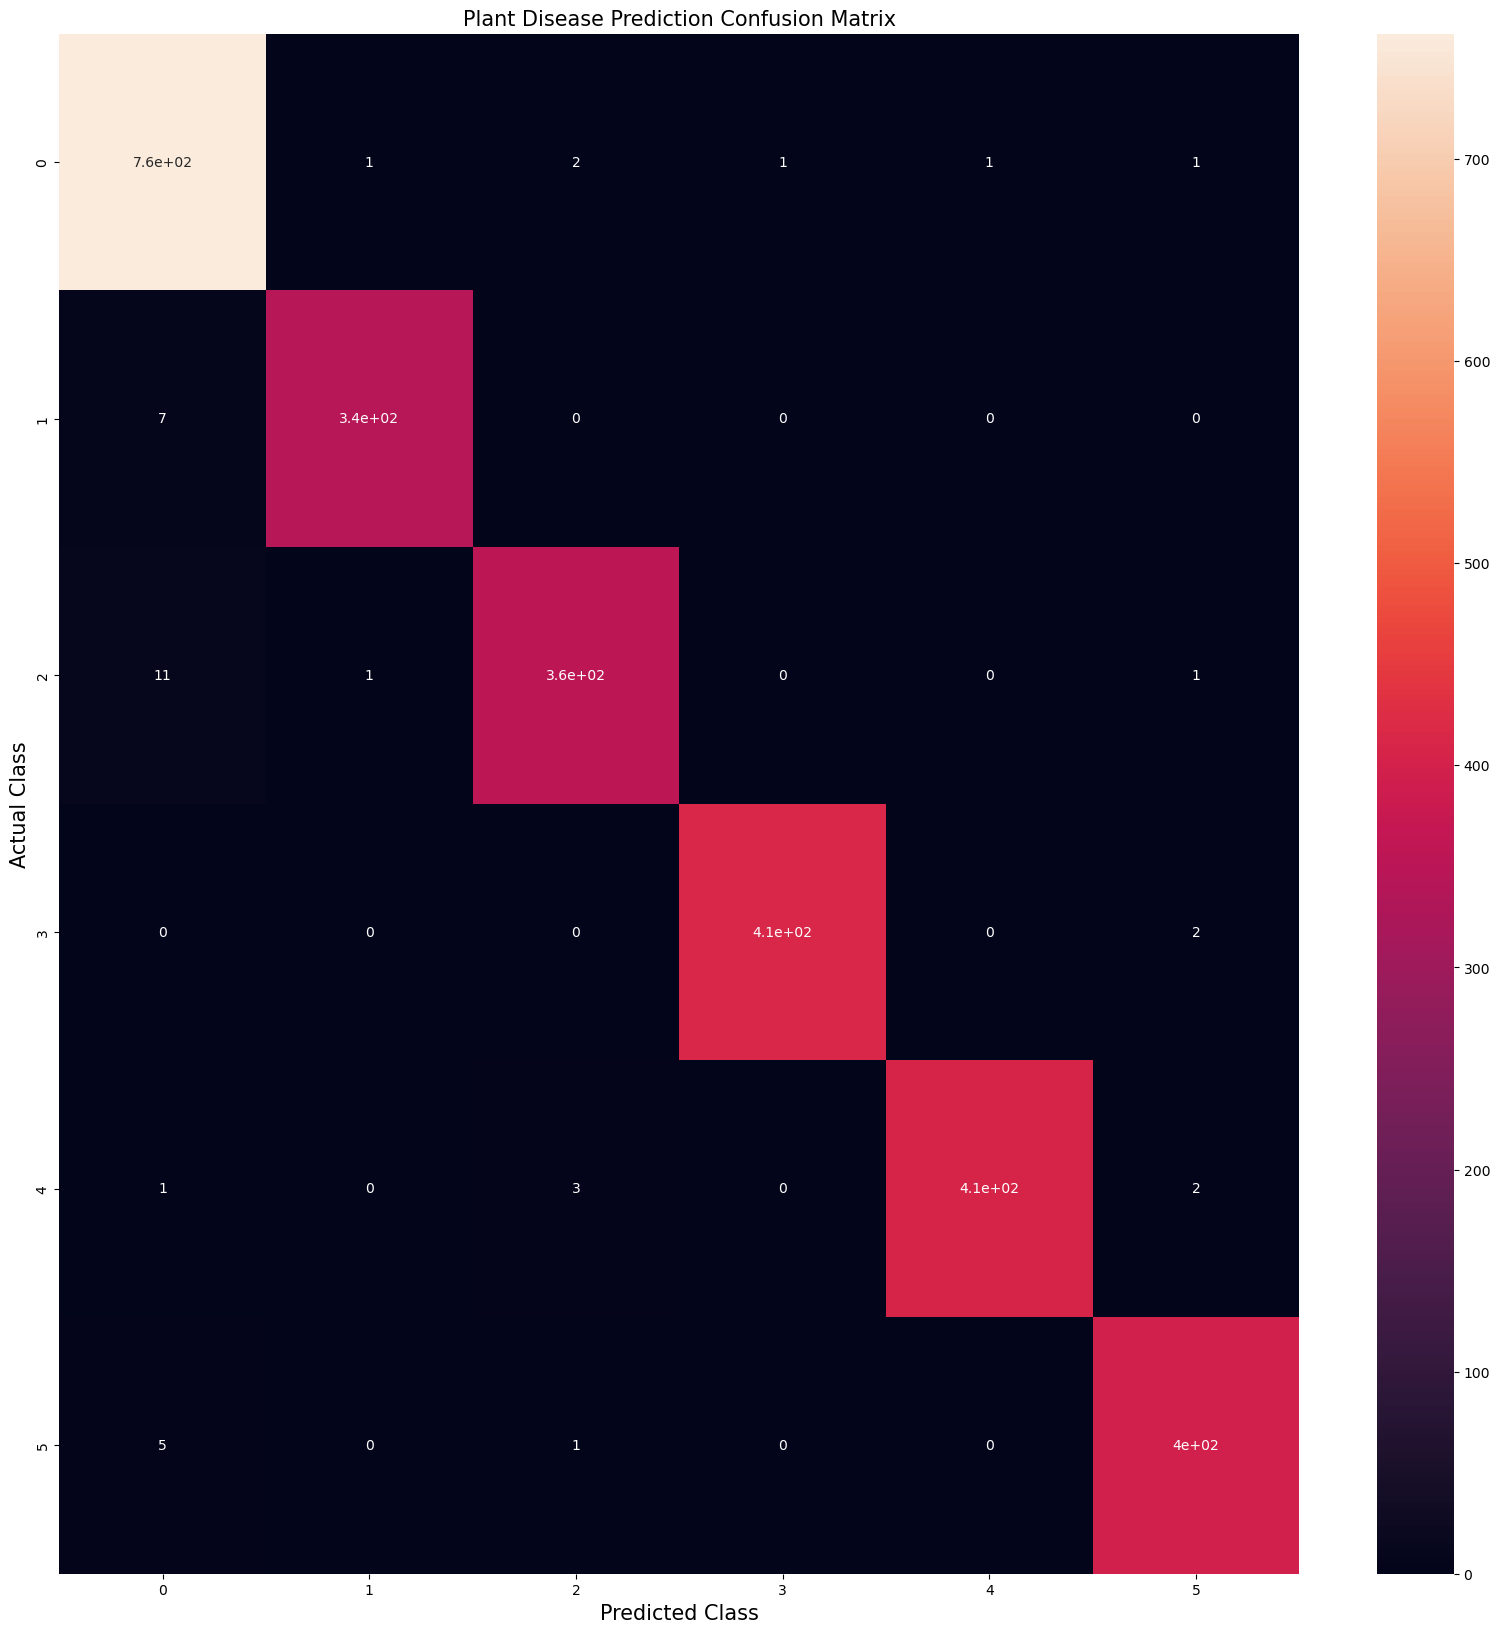

In [106]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 15)
plt.ylabel('Actual Class',fontsize = 15)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 15)
plt.show()